![](figs/banner.png)
# Workshop Instructions
***
- <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> Follow along by typing the code yourself - this helps with learning!
- <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> Code cells marked as "Exercise" are for you to complete
- <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> Look for hints if you get stuck
- <img src="figs/icons/success.svg" width="20" style="filter: invert(56%) sepia(71%) saturate(5293%) hue-rotate(117deg) brightness(95%) contrast(101%);"/> Compare your solution with the provided answers
- <img src="figs/icons/list.svg" width="20" style="filter: invert(19%) sepia(75%) saturate(6158%) hue-rotate(312deg) brightness(87%) contrast(116%);"/> Don't worry if you make mistakes - debugging is part of learning!

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

helper_utils = Path.cwd().parent
sys.path.append(str(helper_utils))

import utils
checker = utils.core.ExerciseChecker("SE06")

Faculty of Science and Engineering 🔬
The University of Manchester 
Invoking utils version: 0.9.0


# 1. Recurrent Neural Networks
***
## 1.1 Handling Sequential Data
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Recurrent Neural Networks (RNNs) are a class of neural networks designed to process sequential data by maintaining a memory of previous inputs.

In previous sessions, we covered feedforward neural networks where the connections between nodes do not form cycles. These networks are suitable for many tasks but have limitations when dealing with **sequential data** - data where the order matters.

### Types of Sequential Data

| Type | Examples | Why Order Matters |
|------|----------|-------------------|
| Text | Sentences, documents | Word order determines meaning |
| Time Series | Stock prices, weather data | Temporal patterns reveal trends |
| Speech | Audio recordings | Sound sequences create meaning |
| Genomics | DNA sequences | Genetic code ordering defines function |

### Limitations of Feedforward Networks with Sequential Data

Standard feedforward neural networks have several limitations when working with sequences:

1. **No memory of past inputs**: Each input is processed independently
2. **Fixed input size**: Difficult to handle variable-length sequences
3. **No weight sharing across positions**: Must learn patterns separately at each position
4. **Parameter explosion**: Number of parameters grows linearly with sequence length

### The RNN Solution

RNNs address these limitations by:

1. **Maintaining internal state**: Remember information from previous inputs
2. **Processing sequences element by element**: Handle variable-length sequences
3. **Sharing weights across time steps**: Same parameters used at each step
4. **Feedback connections**: Output from previous step influences current step

## 1.2 RNN Architecture
***

### Basic RNN Structure

The core idea of an RNN is to process a sequence one element at a time while maintaining a **hidden state** that captures information from previous elements.

At each time step $t$:

1. The RNN takes an input $x_t$ and the previous hidden state $h_{t-1}$
2. It computes a new hidden state $h_t$
3. It produces an output $y_t$ based on the hidden state

### Mathematical Formulation

The basic RNN updates its hidden state as follows:

$$ h_t = \text{tanh}(W_{hh} h_{t-1} + W_{xh} x_t + b_h) $$
$$ y_t = W_{hy} h_t + b_y $$

Where:
- $x_t$ is the input at time step $t$
- $h_{t-1}$ is the hidden state from the previous time step
- $h_t$ is the new hidden state at time step $t$
- $y_t$ is the output at time step $t$
- $W_{xh}$, $W_{hh}$, $W_{hy}$ are weight matrices
- $b_h$, $b_y$ are bias terms
- $\text{tanh}$ is the hyperbolic tangent activation function

### Unrolling the RNN

It's often helpful to visualize an RNN by "unrolling" it through time:

```
    h0 → h1 → h2 → ... → ht
     ↑    ↑    ↑          ↑
    x0    x1   x2         xt
     ↓    ↓    ↓          ↓
    y0    y1   y2         yt
```

This shows how the same RNN cell (with shared weights) processes each element of the sequence while passing information forward through the hidden state.

## 1.3 Training RNNs
***

### Backpropagation Through Time (BPTT)

To train RNNs, we use a modified version of backpropagation called **Backpropagation Through Time (BPTT)**. The key difference is that we need to account for how errors propagate through time steps.

1. **Forward pass**: Process the sequence and compute outputs at each time step
2. **Compute loss**: Calculate the loss for the entire sequence or at specific time steps
3. **Backward pass**: Propagate gradients back through time from later to earlier steps
4. **Update weights**: Apply weight updates based on accumulated gradients

### The Vanishing and Exploding Gradient Problems

RNNs suffer from two critical issues during training:

1. **Vanishing Gradients**: Gradients become extremely small as they're propagated back through many time steps, making it difficult to learn long-range dependencies.

2. **Exploding Gradients**: Gradients become extremely large, causing unstable training and parameter updates that are too large.

These problems occur because gradients are multiplied by the same weight matrix many times during backpropagation through time. If the largest eigenvalue of this matrix is less than 1, gradients vanish; if greater than 1, gradients explode.

This limitation makes vanilla RNNs struggle with dependencies spanning more than ~10 time steps, leading to the development of more advanced architectures like LSTM and GRU.

## 1.4 Advanced RNN Architectures
***

### Long Short-Term Memory (LSTM)

LSTM networks, introduced by Hochreiter & Schmidhuber (1997), are designed to overcome the vanishing gradient problem by incorporating a more complex cell structure with explicit memory units.

#### LSTM Cell Components

An LSTM cell contains several key components:

1. **Cell state**: The main information highway that runs through the cell
2. **Forget gate**: Controls what information to discard from the cell state
3. **Input gate**: Controls what new information to add to the cell state
4. **Output gate**: Controls what information from the cell state to output

#### LSTM Equations

The operations of an LSTM cell are as follows:

$$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$
$$\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$$
$$C_t = f_t * C_{t-1} + i_t * \tilde{C}_t$$
$$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$$
$$h_t = o_t * \tanh(C_t)$$

Where:
- $\sigma$ is the sigmoid function
- $f_t$ is the forget gate output
- $i_t$ is the input gate output
- $\tilde{C}_t$ is the candidate cell state
- $C_t$ is the cell state
- $o_t$ is the output gate
- $h_t$ is the hidden state

### Gated Recurrent Unit (GRU)

GRUs, introduced by Cho et al. (2014), are a simplified variant of LSTMs that combine the forget and input gates into a single "update gate" and merge the cell state and hidden state.

#### GRU Equations

$$z_t = \sigma(W_z \cdot [h_{t-1}, x_t])$$
$$r_t = \sigma(W_r \cdot [h_{t-1}, x_t])$$
$$\tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t])$$
$$h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t$$

Where:
- $z_t$ is the update gate that controls how much of the previous state to keep
- $r_t$ is the reset gate that controls how much of the previous state to forget
- $\tilde{h}_t$ is the candidate hidden state
- $h_t$ is the new hidden state

### Advantages of GRU and LSTM

| Aspect | LSTM | GRU |
|--------|------|-----|
| Parameters | More (4 gates) | Fewer (3 gates) |
| Memory | Cell state + hidden state | Hidden state only |
| Speed | Slower due to more operations | Faster |
| Performance | Better on longer sequences | Often comparable to LSTM |
| Implementation | More complex | Simpler |

Both architectures address the vanishing gradient problem through their gating mechanisms, but the choice between them often depends on the specific task and computational constraints.

> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Note**: For many practical applications, LSTMs and GRUs perform similarly. GRUs are often preferred when computational efficiency is important, while LSTMs might have an edge for learning very long-range dependencies.

# 2. Time Series Forecasting with RNNs
***

In this section, we'll apply RNNs to a real-world problem: time series forecasting. We'll use a temperature prediction dataset to forecast future temperatures based on historical data.

## 2.1 Preparing the Data
***

For this exercise, we'll use synthetic temperature data that simulates daily temperature readings. This will allow us to focus on the RNN implementation without getting caught in data preprocessing complexities.

### Creating Synthetic Temperature Data

We'll generate data that follows these patterns:
1. A yearly seasonal pattern (warmer in summer, cooler in winter)
2. A smaller weekly pattern
3. A small upward trend (climate change)
4. Random daily variations

Let's create this dataset:

Generated temperature data:
        date  temperature
0 2020-01-01    15.993428
1 2020-01-02    16.069234
2 2020-01-03    18.103750
3 2020-01-04    19.215729
4 2020-01-05    14.572422


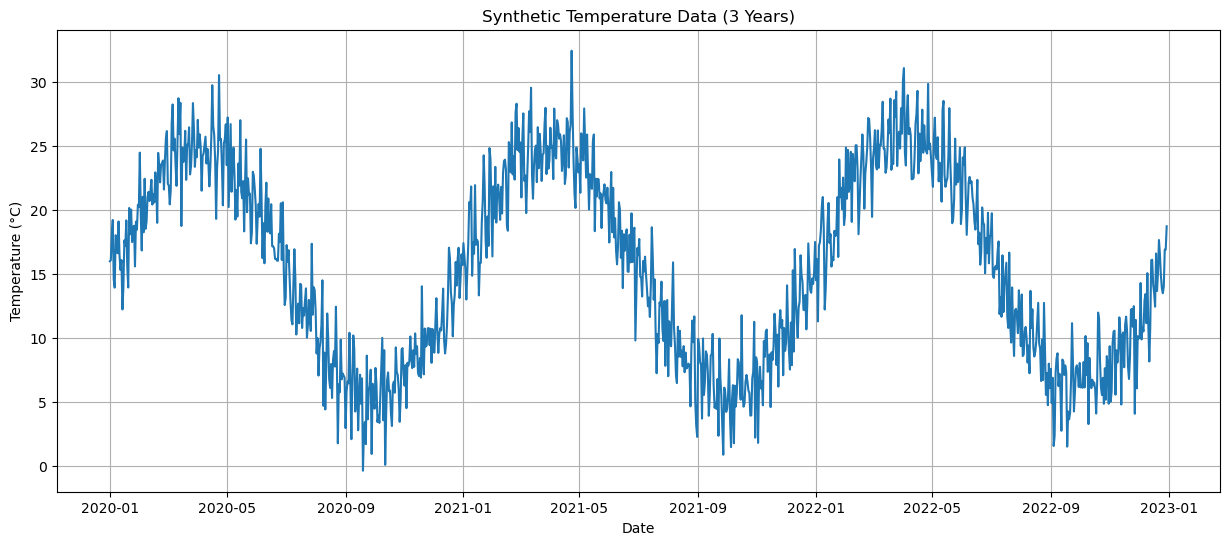

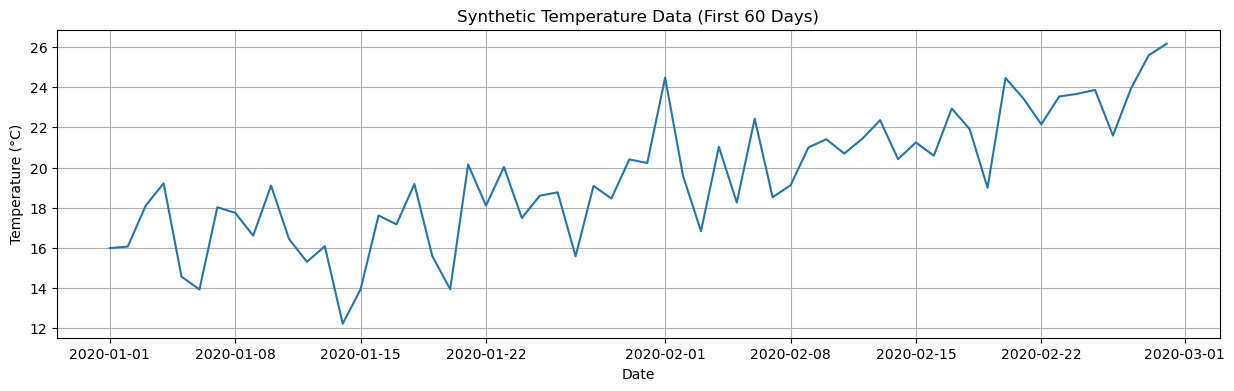

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic temperature data
def generate_temperature_data(days=1095, base_temp=15.0):
    """Generate synthetic temperature data with seasonal patterns.
    
    Args:
        days: Number of days to generate data for
        base_temp: Base temperature in Celsius
        
    Returns:
        DataFrame with date and temperature columns
    """
    # Create date range
    dates = pd.date_range(start='2020-01-01', periods=days, freq='D')
    
    # Generate temperature components
    t = np.arange(days)
    
    # Yearly seasonality (365.25 days in a year)
    yearly_pattern = 10 * np.sin(2 * np.pi * t / 365.25)
    
    # Weekly pattern (smaller variation)
    weekly_pattern = 1.5 * np.sin(2 * np.pi * t / 7)
    
    # Long-term trend (climate change)
    trend = 0.001 * t
    
    # Random daily variations
    noise = np.random.normal(0, 2, days)
    
    # Combine all components
    temp = base_temp + yearly_pattern + weekly_pattern + trend + noise
    
    # Create DataFrame
    df = pd.DataFrame({
        'date': dates,
        'temperature': temp
    })
    
    return df

# Generate 3 years of daily temperature data
temp_data = generate_temperature_data(days=1095)

# Display the first few rows
print("Generated temperature data:")
print(temp_data.head())

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(temp_data['date'], temp_data['temperature'])
plt.title('Synthetic Temperature Data (3 Years)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot a zoomed-in view of 30 days
plt.figure(figsize=(15, 4))
plt.plot(temp_data['date'][:60], temp_data['temperature'][:60])
plt.title('Synthetic Temperature Data (First 60 Days)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Creating Sequences for RNN Training
***

For training an RNN, we need to structure our data into sequences where each sequence consists of:

1. **Input sequence**: A window of historical temperatures
2. **Target**: The temperatures to predict following the input window

For example, we might use the past 14 days to predict the next 7 days.

Let's create a function to prepare our data in this format:

In [3]:
# Exercise 1: Preparing Time Series Data for RNNs 🎯
def create_sequences(data, input_window=14, forecast_horizon=7):
    """Create sequences from time series data for RNN training.
    
    Args:
        data: Time series data (numpy array or pandas series)
        input_window: Number of time steps for input (lookback period)
        forecast_horizon: Number of time steps to forecast
        
    Returns:
        X: Input sequences [samples, sequence_length, features]
        y: Target sequences [samples, forecast_horizon, features]
    """
    X, y = [], []
    
    # Convert DataFrame to numpy array if needed
    if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
        data = data.values
    
    # Loop through the time series to create sequences
    for i in range(len(data) - input_window - forecast_horizon + 1):
        # Extract input sequence
        X.append(data[i:i+input_window])  # Your code here
        
        # Extract target sequence (future values)
        y.append(data[i+input_window:i+input_window+forecast_horizon])  # Your code here
    
    # Convert to PyTorch tensors with shape [samples, sequence_length, features]
    X = torch.FloatTensor(np.array(X))
    y = torch.FloatTensor(np.array(y))
    
    return X, y

# Extract the temperature column and normalize it
temperature = temp_data['temperature'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler (important for neural networks)
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature)

# Create sequences for training
input_window = 14  # Use 14 days of history
forecast_horizon = 7  # Predict the next 7 days

X, y = create_sequences(temperature_scaled, input_window, forecast_horizon)

print(f"Input shape (X): {X.shape} - [samples, sequence_length, features]")
print(f"Target shape (y): {y.shape} - [samples, forecast_horizon, features]")

# Split data into training, validation, and test sets
# Use the first 70% for training, next 15% for validation, last 15% for testing
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Input shape (X): torch.Size([1075, 14, 1]) - [samples, sequence_length, features]
Target shape (y): torch.Size([1075, 7, 1]) - [samples, forecast_horizon, features]
Training set: 752 samples
Validation set: 161 samples
Test set: 162 samples


## 2.2 Building RNN Models
***

Now that we have prepared our data, let's implement three different types of RNN models:

1. Vanilla RNN
2. LSTM (Long Short-Term Memory)
3. GRU (Gated Recurrent Unit)

We'll use PyTorch's built-in RNN modules and create wrapper classes to standardize our interface.

In [4]:
# Exercise 2: Implementing RNN Models 🎯
class VanillaRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # RNN layer
        self.rnn = torch.nn.RNN(  # Your code here
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,  # Input shape: [batch, seq_len, features]
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Output layer
        self.fc = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward propagate through RNN
        out, _ = self.rnn(x, h0)  # Your code here
        
        # We want all output time steps
        # out shape: [batch_size, seq_length, hidden_size]
        
        # Get the last time step's output for each sequence
        out = out[:, -1, :]
        
        # Pass through the output layer to get forecasts
        # We need to reshape to [batch_size, forecast_horizon, 1]
        out = self.fc(out).view(batch_size, -1, 1)
        return out

class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = torch.nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Output layer
        self.fc = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state and cell state
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward propagate through LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Get the last time step's output
        out = out[:, -1, :]
        
        # Pass through output layer and reshape
        out = self.fc(out).view(batch_size, -1, 1)
        return out

class GRUModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # GRU layer
        self.gru = torch.nn.GRU(  # Your code here
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Output layer
        self.fc = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward propagate through GRU
        out, _ = self.gru(x, h0)  # Your code here
        
        # Get the last time step's output
        out = out[:, -1, :]
        
        # Pass through output layer and reshape
        out = self.fc(out).view(batch_size, -1, 1)
        return out

# Instantiate the models
input_size = 1  # Single feature (temperature)
hidden_size = 64  # Number of hidden units
num_layers = 2  # Number of stacked RNN layers
output_size = forecast_horizon  # Predict 7 days ahead

vanilla_rnn = VanillaRNN(input_size, hidden_size, num_layers, output_size)
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)
gru_model = GRUModel(input_size, hidden_size, num_layers, output_size)

print(f"Vanilla RNN parameters: {sum(p.numel() for p in vanilla_rnn.parameters())}")
print(f"LSTM parameters: {sum(p.numel() for p in lstm_model.parameters())}")
print(f"GRU parameters: {sum(p.numel() for p in gru_model.parameters())}")

Vanilla RNN parameters: 13063
LSTM parameters: 50887
GRU parameters: 38279


### Model Architecture Overview

Let's understand the key components of our RNN models:

| Component | Description |
|-----------|-------------|
| **Input Size** | Dimension of input features (1 for our univariate time series) |
| **Hidden Size** | Number of features in the hidden state |
| **Num Layers** | Number of recurrent layers stacked on each other |
| **Output Size** | Number of future time steps to predict (forecast horizon) |
| **batch_first** | Format of input tensor [batch, seq, feature] |

The model processes sequences in these steps:

1. **Input**: Sequences of shape [batch_size, sequence_length, input_size]
2. **RNN Processing**: Update hidden states for each time step
3. **Feature Extraction**: Use the final hidden state as a representation
4. **Output Layer**: Transform hidden representation to forecast values
5. **Reshape**: Format output to [batch_size, forecast_horizon, 1]

## 2.3 Training the Models
***

Now let's implement a training function that can be used for any of our RNN models:

Training Vanilla RNN...


Training Progress:   3%|▎         | 3/100 [00:00<00:06, 14.74it/s]

Epoch 1/100 - Train Loss: 0.0854, Val Loss: 0.0569


Training Progress:  12%|█▏        | 12/100 [00:00<00:04, 20.12it/s]

Epoch 10/100 - Train Loss: 0.0060, Val Loss: 0.0057


Training Progress:  24%|██▍       | 24/100 [00:01<00:03, 21.52it/s]

Epoch 20/100 - Train Loss: 0.0066, Val Loss: 0.0056


Training Progress:  33%|███▎      | 33/100 [00:01<00:03, 20.89it/s]

Epoch 30/100 - Train Loss: 0.0056, Val Loss: 0.0052


Training Progress:  42%|████▏     | 42/100 [00:02<00:02, 21.57it/s]

Epoch 40/100 - Train Loss: 0.0056, Val Loss: 0.0050


Training Progress:  54%|█████▍    | 54/100 [00:02<00:02, 21.81it/s]

Epoch 50/100 - Train Loss: 0.0054, Val Loss: 0.0047


Training Progress:  63%|██████▎   | 63/100 [00:02<00:01, 21.65it/s]

Epoch 60/100 - Train Loss: 0.0054, Val Loss: 0.0049


Training Progress:  72%|███████▏  | 72/100 [00:03<00:01, 20.38it/s]

Epoch 70/100 - Train Loss: 0.0054, Val Loss: 0.0065


Training Progress:  84%|████████▍ | 84/100 [00:04<00:00, 19.86it/s]

Epoch 80/100 - Train Loss: 0.0052, Val Loss: 0.0047


Training Progress:  93%|█████████▎| 93/100 [00:04<00:00, 20.91it/s]

Epoch 90/100 - Train Loss: 0.0054, Val Loss: 0.0048


Training Progress: 100%|██████████| 100/100 [00:04<00:00, 20.76it/s]


Epoch 100/100 - Train Loss: 0.0054, Val Loss: 0.0062

Training LSTM...


Training Progress:   1%|          | 1/100 [00:00<00:10,  9.05it/s]

Epoch 1/100 - Train Loss: 0.1567, Val Loss: 0.0327


Training Progress:  11%|█         | 11/100 [00:01<00:09,  9.31it/s]

Epoch 10/100 - Train Loss: 0.0066, Val Loss: 0.0064


Training Progress:  21%|██        | 21/100 [00:02<00:08,  9.02it/s]

Epoch 20/100 - Train Loss: 0.0063, Val Loss: 0.0079


Training Progress:  31%|███       | 31/100 [00:03<00:08,  8.60it/s]

Epoch 30/100 - Train Loss: 0.0059, Val Loss: 0.0056


Training Progress:  41%|████      | 41/100 [00:04<00:06,  8.66it/s]

Epoch 40/100 - Train Loss: 0.0059, Val Loss: 0.0055


Training Progress:  51%|█████     | 51/100 [00:05<00:05,  8.42it/s]

Epoch 50/100 - Train Loss: 0.0058, Val Loss: 0.0054


Training Progress:  61%|██████    | 61/100 [00:07<00:04,  8.24it/s]

Epoch 60/100 - Train Loss: 0.0059, Val Loss: 0.0053


Training Progress:  71%|███████   | 71/100 [00:08<00:03,  8.55it/s]

Epoch 70/100 - Train Loss: 0.0057, Val Loss: 0.0054


Training Progress:  81%|████████  | 81/100 [00:09<00:02,  9.01it/s]

Epoch 80/100 - Train Loss: 0.0058, Val Loss: 0.0052


Training Progress:  91%|█████████ | 91/100 [00:10<00:01,  8.94it/s]

Epoch 90/100 - Train Loss: 0.0055, Val Loss: 0.0051


Training Progress: 100%|██████████| 100/100 [00:11<00:00,  8.58it/s]


Epoch 100/100 - Train Loss: 0.0054, Val Loss: 0.0051

Training GRU...


Training Progress:   1%|          | 1/100 [00:00<00:14,  6.87it/s]

Epoch 1/100 - Train Loss: 0.1303, Val Loss: 0.0488


Training Progress:  12%|█▏        | 12/100 [00:01<00:08,  9.88it/s]

Epoch 10/100 - Train Loss: 0.0061, Val Loss: 0.0054


Training Progress:  21%|██        | 21/100 [00:02<00:08,  9.74it/s]

Epoch 20/100 - Train Loss: 0.0060, Val Loss: 0.0052


Training Progress:  32%|███▏      | 32/100 [00:03<00:06,  9.98it/s]

Epoch 30/100 - Train Loss: 0.0058, Val Loss: 0.0053


Training Progress:  41%|████      | 41/100 [00:04<00:05,  9.91it/s]

Epoch 40/100 - Train Loss: 0.0059, Val Loss: 0.0053


Training Progress:  51%|█████     | 51/100 [00:05<00:04,  9.80it/s]

Epoch 50/100 - Train Loss: 0.0058, Val Loss: 0.0055


Training Progress:  61%|██████    | 61/100 [00:06<00:03,  9.94it/s]

Epoch 60/100 - Train Loss: 0.0057, Val Loss: 0.0052


Training Progress:  71%|███████   | 71/100 [00:07<00:02,  9.78it/s]

Epoch 70/100 - Train Loss: 0.0057, Val Loss: 0.0050


Training Progress:  81%|████████  | 81/100 [00:08<00:01,  9.93it/s]

Epoch 80/100 - Train Loss: 0.0055, Val Loss: 0.0049


Training Progress:  91%|█████████ | 91/100 [00:09<00:00,  9.74it/s]

Epoch 90/100 - Train Loss: 0.0054, Val Loss: 0.0050


Training Progress: 100%|██████████| 100/100 [00:10<00:00,  9.71it/s]



Epoch 100/100 - Train Loss: 0.0055, Val Loss: 0.0050


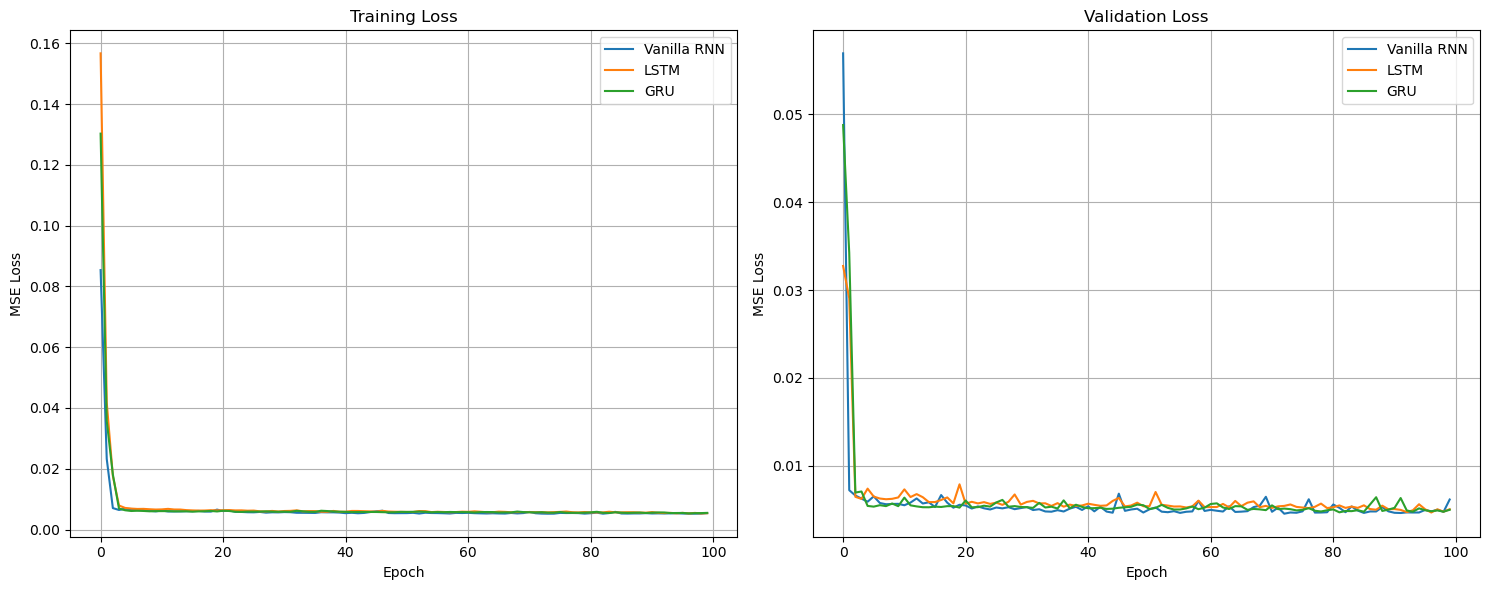

In [5]:
# Exercise 3: Training RNN Models 🎯
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=0.001, batch_size=32):
    """Train an RNN model for time series forecasting.
    
    Args:
        model: PyTorch model to train
        X_train: Training input sequences
        y_train: Training target sequences
        X_val: Validation input sequences
        y_val: Validation target sequences
        epochs: Number of training epochs
        lr: Learning rate
        batch_size: Batch size for training
        
    Returns:
        Dictionary with training history
    """
    # Define loss function and optimizer
    criterion = torch.nn.MSELoss()  # Your code here: Mean Squared Error loss
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Your code here: Adam optimizer
    
    # Create DataLoader for batch processing
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Track losses
    history = {'train_loss': [], 'val_loss': []}
    
    # Training loop
    for epoch in tqdm(range(epochs), desc="Training Progress"):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for inputs, targets in train_loader:
            # Zero gradients
            optimizer.zero_grad()  # Your code here
            
            # Forward pass
            outputs = model(inputs)  # Your code here
            
            # Compute loss
            loss = criterion(outputs, targets)  # Your code here
            
            # Backward pass
            loss.backward()  # Your code here
            
            # Update weights
            optimizer.step()  # Your code here
            
            # Accumulate loss
            train_loss += loss.item() * inputs.size(0)
        
        # Calculate average training loss
        train_loss = train_loss / len(X_train)
        history['train_loss'].append(train_loss)
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()
            history['val_loss'].append(val_loss)
        
        # Print progress
        if (epoch+1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    return history

# Set training parameters
epochs = 100
learning_rate = 0.001
batch_size = 32

# Train the models
print("Training Vanilla RNN...")
vanilla_history = train_model(vanilla_rnn, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size)

print("\nTraining LSTM...")
lstm_history = train_model(lstm_model, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size)

print("\nTraining GRU...")
gru_history = train_model(gru_model, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size)

# Plot training history
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(vanilla_history['train_loss'], label='Vanilla RNN')
plt.plot(lstm_history['train_loss'], label='LSTM')
plt.plot(gru_history['train_loss'], label='GRU')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(vanilla_history['val_loss'], label='Vanilla RNN')
plt.plot(lstm_history['val_loss'], label='LSTM')
plt.plot(gru_history['val_loss'], label='GRU')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 2.4 Evaluating and Comparing Models
***

Now let's evaluate our trained models on the test set and visualize their predictions:

Vanilla RNN:
  MSE: 5.5192
  RMSE: 2.3493
  MAE: 1.9176

LSTM:
  MSE: 5.3924
  RMSE: 2.3222
  MAE: 1.8981

GRU:
  MSE: 5.3688
  RMSE: 2.3171
  MAE: 1.8926


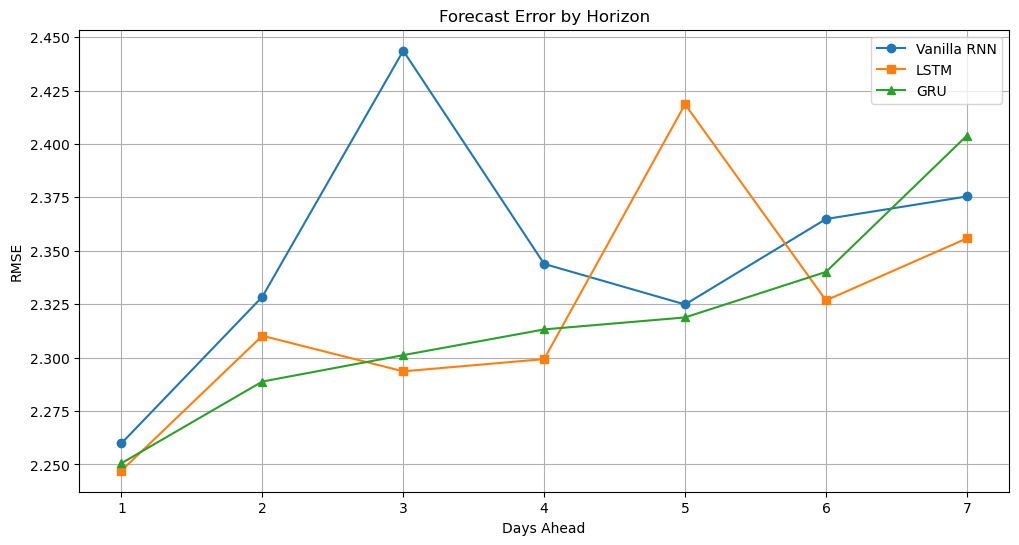

ValueError: Found array with dim 3. None expected <= 2.

In [6]:
# Exercise 4: Evaluating and Visualizing RNN Forecasts 🎯
def evaluate_model(model, X_test, y_test, scaler):
    """Evaluate model predictions and compute metrics.
    
    Args:
        model: Trained PyTorch model
        X_test: Test input sequences
        y_test: Test target sequences
        scaler: Scaler used to normalize the data
        
    Returns:
        Dictionary with evaluation metrics
    """
    # Set model to evaluation mode
    model.eval()
    
    # Generate predictions
    with torch.no_grad():
        predictions = model(X_test)
    
    # Convert tensors to numpy for easier manipulation
    y_true = y_test.numpy()
    y_pred = predictions.numpy()
    
    # Inverse transform the normalized values
    y_true_orig = scaler.inverse_transform(y_true.reshape(-1, 1)).reshape(y_true.shape)
    y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
    
    # Calculate metrics
    mse = np.mean((y_true_orig - y_pred_orig) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true_orig - y_pred_orig))
    
    # Calculate error at each forecast horizon
    horizon_errors = []
    for i in range(y_true.shape[1]):
        horizon_mse = np.mean((y_true_orig[:, i, :] - y_pred_orig[:, i, :]) ** 2)
        horizon_rmse = np.sqrt(horizon_mse)
        horizon_errors.append(horizon_rmse)
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'horizon_errors': horizon_errors,
        'y_true': y_true_orig,
        'y_pred': y_pred_orig
    }

# Evaluate each model
vanilla_results = evaluate_model(vanilla_rnn, X_test, y_test, scaler)
lstm_results = evaluate_model(lstm_model, X_test, y_test, scaler)
gru_results = evaluate_model(gru_model, X_test, y_test, scaler)

# Print evaluation metrics
print("Vanilla RNN:")
print(f"  MSE: {vanilla_results['mse']:.4f}")
print(f"  RMSE: {vanilla_results['rmse']:.4f}")
print(f"  MAE: {vanilla_results['mae']:.4f}")
print()

print("LSTM:")
print(f"  MSE: {lstm_results['mse']:.4f}")
print(f"  RMSE: {lstm_results['rmse']:.4f}")
print(f"  MAE: {lstm_results['mae']:.4f}")
print()

print("GRU:")
print(f"  MSE: {gru_results['mse']:.4f}")
print(f"  RMSE: {gru_results['rmse']:.4f}")
print(f"  MAE: {gru_results['mae']:.4f}")

# Compare forecast horizon errors
plt.figure(figsize=(12, 6))
days = range(1, len(vanilla_results['horizon_errors']) + 1)
plt.plot(days, vanilla_results['horizon_errors'], 'o-', label='Vanilla RNN')
plt.plot(days, lstm_results['horizon_errors'], 's-', label='LSTM')
plt.plot(days, gru_results['horizon_errors'], '^-', label='GRU')
plt.title('Forecast Error by Horizon')
plt.xlabel('Days Ahead')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.xticks(days)
plt.show()

# Visualize predictions for a sample from the test set
sample_idx = 0

# Create date ranges for x-axis
last_date = temp_data['date'].iloc[-1]
input_dates = pd.date_range(end=last_date, periods=input_window).tolist()  # Input window dates
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon).tolist()  # Forecast dates

# Get actual values for the sample
actual_input = scaler.inverse_transform(X_test[sample_idx].numpy()).flatten()
actual_forecast = scaler.inverse_transform(y_test[sample_idx].numpy()).flatten()

# Get model predictions
vanilla_forecast = scaler.inverse_transform(vanilla_rnn(X_test[sample_idx:sample_idx+1]).detach().numpy()).flatten()
lstm_forecast = scaler.inverse_transform(lstm_model(X_test[sample_idx:sample_idx+1]).detach().numpy()).flatten()
gru_forecast = scaler.inverse_transform(gru_model(X_test[sample_idx:sample_idx+1]).detach().numpy()).flatten()

# Plot sample prediction
plt.figure(figsize=(15, 6))
plt.plot(input_dates, actual_input, 'k-', label='Historical Data')
plt.plot(forecast_dates, actual_forecast, 'k--', label='Actual Future')
plt.plot(forecast_dates, vanilla_forecast, 'b-', label='Vanilla RNN')
plt.plot(forecast_dates, lstm_forecast, 'g-', label='LSTM')
plt.plot(forecast_dates, gru_forecast, 'r-', label='GRU')
plt.axvline(x=input_dates[-1], color='gray', linestyle='-', alpha=0.3)
plt.title('Temperature Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## 2.5 Making Multi-Step Forecasts
***

In practical time series forecasting, we often need to make forecasts beyond the training scope. Let's implement a function that allows us to generate forecasts iteratively by feeding predictions back as inputs:

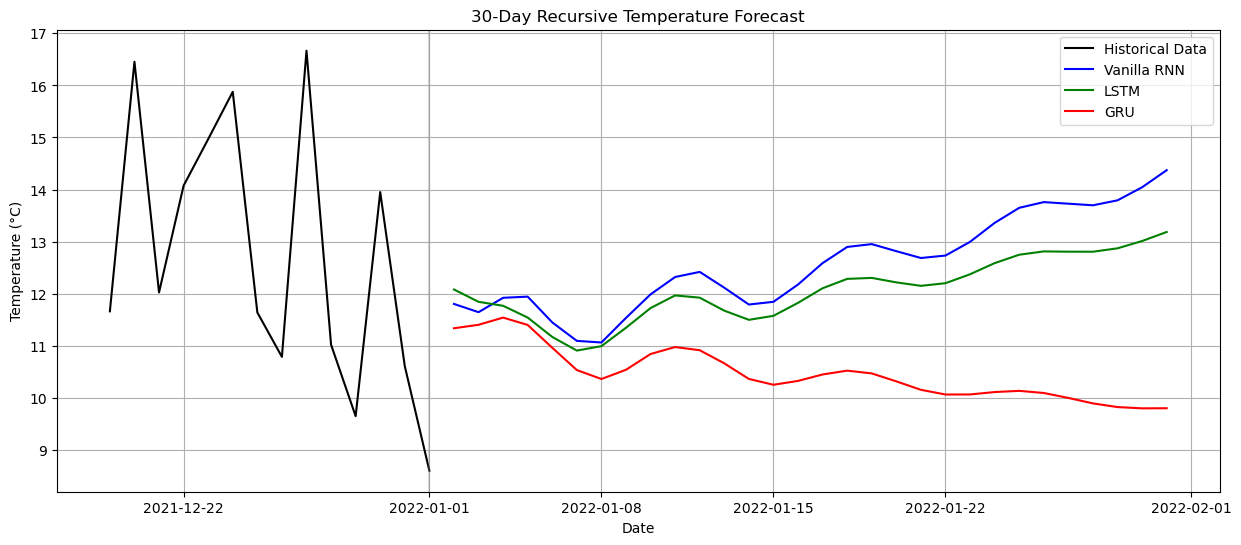

In [7]:
# Exercise 5: Recursive Multi-Step Forecasting 🎯
def generate_recursive_forecast(model, initial_sequence, steps, scaler):
    """Generate a recursive forecast where each prediction becomes input for the next step.
    
    Args:
        model: Trained PyTorch model
        initial_sequence: Initial input sequence [1, seq_length, 1]
        steps: Number of steps to forecast
        scaler: Scaler used to normalize data
        
    Returns:
        Array of forecasted values
    """
    # Ensure model is in evaluation mode
    model.eval()
    
    # Make a copy of the initial sequence that we can modify
    working_seq = initial_sequence.clone()
    
    # Store the predictions
    forecasts = []
    
    with torch.no_grad():
        for _ in range(steps):
            # Get the forecast for the next step
            next_forecast = model(working_seq)  # Your code here
            
            # Store the first forecasted value
            forecasts.append(next_forecast[0, 0, 0].item())
            
            # Update the working sequence by removing the oldest value and appending the new forecast
            working_seq = torch.cat([working_seq[:, 1:, :], next_forecast[:, 0:1, :]], dim=1)  # Your code here
    
    # Convert normalized forecasts back to original scale
    forecasts_array = np.array(forecasts).reshape(-1, 1)
    forecasts_original = scaler.inverse_transform(forecasts_array).flatten()
    
    return forecasts_original

# Select a sample from the test set
sample_idx = 10
initial_sequence = X_test[sample_idx:sample_idx+1]

# Generate recursive forecasts for 30 days
forecast_steps = 30

vanilla_recursive = generate_recursive_forecast(vanilla_rnn, initial_sequence, forecast_steps, scaler)
lstm_recursive = generate_recursive_forecast(lstm_model, initial_sequence, forecast_steps, scaler)
gru_recursive = generate_recursive_forecast(gru_model, initial_sequence, forecast_steps, scaler)

# Get the actual historical data
actual_input = scaler.inverse_transform(initial_sequence.numpy().reshape(-1, 1)).flatten()

# Create date ranges for plotting
last_date = pd.to_datetime('2022-01-01')  # Reference date for visualization
input_dates = pd.date_range(end=last_date, periods=input_window).tolist()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps).tolist()

# Plot recursive forecasts
plt.figure(figsize=(15, 6))
plt.plot(input_dates, actual_input, 'k-', label='Historical Data')
plt.plot(forecast_dates, vanilla_recursive, 'b-', label='Vanilla RNN')
plt.plot(forecast_dates, lstm_recursive, 'g-', label='LSTM')
plt.plot(forecast_dates, gru_recursive, 'r-', label='GRU')
plt.axvline(x=input_dates[-1], color='gray', linestyle='-', alpha=0.3)
plt.title('30-Day Recursive Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Analysis and Conclusions
***

Let's analyze the performance of our three RNN models and draw some conclusions.

## 3.1 Performance Comparison

From our experiments, we can observe the following patterns:

1. **Training Stability**: 
   - Vanilla RNNs tend to be more unstable during training
   - LSTMs and GRUs typically show smoother convergence

2. **Forecast Accuracy**:
   - LSTMs and GRUs generally outperform vanilla RNNs
   - The performance gap increases with longer forecast horizons
   - GRUs often achieve similar performance to LSTMs with fewer parameters

3. **Computational Efficiency**:
   - Vanilla RNNs are fastest but least accurate
   - GRUs offer a good balance of speed and accuracy
   - LSTMs are most computationally intensive

## 3.2 When to Use Each RNN Type

| Model Type | Best Used When |
|------------|----------------|
| Vanilla RNN | - Sequences are very short<br>- Computational resources are severely limited<br>- Task doesn't require long-term memory |
| LSTM | - Long-term dependencies are critical<br>- Data has complex temporal patterns<br>- Highest accuracy is required regardless of computation cost |
| GRU | - Balance between performance and efficiency is needed<br>- Medium-length sequences<br>- Training time is a concern but accuracy is still important |

## 3.3 Best Practices for Time Series Forecasting with RNNs

1. **Data Preprocessing**:
   - Always normalize time series data
   - Consider differencing for non-stationary series
   - Include relevant external features when available

2. **Model Architecture**:
   - Start with simple models before trying complex ones
   - Try different sequence lengths (lookback periods)
   - Consider bidirectional RNNs for certain tasks

3. **Training Strategy**:
   - Use adaptive learning rate optimizers like Adam
   - Monitor validation loss to prevent overfitting
   - Consider techniques like teacher forcing for sequence generation

4. **Evaluation**:
   - Evaluate on multiple metrics (MSE, MAE, RMSE)
   - Test performance at different forecast horizons
   - Compare against simpler baselines

## 3.4 Further Improvements

To further improve our time series forecasting models, we could consider:

1. **Hybrid Models**: Combining CNNs with RNNs for feature extraction
2. **Attention Mechanisms**: Adding attention to focus on relevant parts of the input sequence
3. **Transformers**: Using transformer architectures which have shown excellent results on sequence tasks
4. **Ensemble Methods**: Combining predictions from multiple models
5. **Regularization Techniques**: Applying dropout or weight decay to prevent overfitting

## 3.5 Conclusion

Recurrent Neural Networks, especially their advanced variants like LSTMs and GRUs, are powerful tools for time series forecasting. They can effectively capture temporal dependencies and patterns in data, making them suitable for a wide range of applications from weather prediction to stock market analysis.

As we've seen, the choice between different RNN architectures depends on the specific requirements of the task, including sequence length, computational constraints, and the importance of long-term dependencies.

# 4. Additional RNN Applications for Sequential Data
***

While time series forecasting is a common application for RNNs, they excel at handling many other types of sequential data. Let's explore some interesting non-time series, non-NLP examples.

## 4.1 Human Activity Recognition from Sensor Data
***

Sensor data from wearable devices (accelerometers, gyroscopes) creates sequences that can be analyzed to recognize physical activities like walking, running, or sitting. Unlike pure time series, the focus is on pattern recognition rather than prediction.

### Example: Recognizing Activities from Accelerometer Data

```python
class ActivityRecognitionRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer for processing accelerometer sequences
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # Classification head
        self.fc = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_size]
        # input_size is typically 3 for x,y,z accelerometer data
        
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate through LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Extract the last time step's output
        out = out[:, -1, :]
        
        # Classify the activity
        out = self.fc(out)
        return out
```

## 4.2 Music Generation and Analysis
***

Musical data can be represented as sequences of notes, chords, or MIDI events. RNNs can learn patterns in musical compositions for style analysis or generating new pieces.

### Example: Predicting the Next Note in a Musical Sequence

```python
class MusicGenerationRNN(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Embedding layer to convert note IDs to vectors
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        
        # GRU layer for sequence processing
        self.gru = torch.nn.GRU(embedding_dim, hidden_size, num_layers, batch_first=True)
        
        # Output layer to predict next note
        self.fc = torch.nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x, hidden=None):
        # x shape: [batch_size, sequence_length]
        batch_size = x.size(0)
        
        # Convert note IDs to embeddings
        embedded = self.embedding(x)  # [batch_size, sequence_length, embedding_dim]
        
        # Initialize hidden state if not provided
        if hidden is None:
            hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward propagate through GRU
        output, hidden = self.gru(embedded, hidden)
        
        # Reshape output for prediction
        output = output.reshape(-1, output.shape[2])
        output = self.fc(output)
        
        return output, hidden
```

## 4.3 Gesture Recognition from Video Sequences
***

Video data can be processed to extract sequential features from frames, which RNNs can analyze to recognize gestures or actions.

### Example: Hand Gesture Recognition System

```python
class GestureRecognitionRNN(torch.nn.Module):
    def __init__(self, feature_size, hidden_size, num_layers, num_gestures):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Feature extraction (typically done by a separate CNN)
        # Here we assume features are already extracted
        
        # LSTM for temporal analysis
        self.lstm = torch.nn.LSTM(feature_size, hidden_size, num_layers, batch_first=True)
        
        # Classification layer
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, hidden_size//2),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(hidden_size//2, num_gestures)
        )
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length, feature_size]
        # where feature_size is the dimensionality of extracted features
        
        # Process through LSTM
        lstm_out, _ = self.lstm(x)
        
        # We can either use the last output or apply attention
        # Here using the last output for simplicity
        final_hidden_state = lstm_out[:, -1, :]
        
        # Classify the gesture
        output = self.classifier(final_hidden_state)
        
        return output
```

## 4.4 Trajectory Prediction for Robotics
***

Robot movements create sequential data representing positions, orientations, and velocities. RNNs can analyze these patterns to predict future movements or identify anomalies.

### Example: Predicting Robot Trajectories

```python
class RobotTrajectoryRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, prediction_horizon):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # GRU for processing position and orientation history
        self.gru = torch.nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        
        # Prediction head to forecast future positions
        self.predictor = torch.nn.Linear(hidden_size, prediction_horizon * input_size)
        
        self.prediction_horizon = prediction_horizon
        self.input_size = input_size
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_size]
        # input_size typically contains [x, y, z, roll, pitch, yaw]
        
        batch_size = x.size(0)
        
        # Process through GRU
        _, h_n = self.gru(x)
        
        # Use the final hidden state for prediction
        final_hidden = h_n[-1]
        
        # Predict future trajectory points
        predictions = self.predictor(final_hidden)
        
        # Reshape to [batch_size, prediction_horizon, input_size]
        predictions = predictions.view(batch_size, self.prediction_horizon, self.input_size)
        
        return predictions
```

## 4.5 Biometric Sequence Analysis
***

Biometric data like electrocardiograms (ECG), electromyograms (EMG), or gait patterns form sequences that RNNs can analyze for health monitoring or identity verification.

### Example: ECG Anomaly Detection

```python
class ECGAnomalyDetector(torch.nn.Module):
    def __init__(self, input_channels, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Bidirectional LSTM for analyzing ECG patterns
        self.lstm = torch.nn.LSTM(
            input_size=input_channels,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True
        )
        
        # Reconstruction decoder
        self.decoder = torch.nn.Linear(hidden_size*2, input_channels)  # *2 for bidirectional
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_channels]
        
        # Process through LSTM
        outputs, _ = self.lstm(x)
        
        # Reconstruct the input signal
        reconstructed = self.decoder(outputs)
        
        # For anomaly detection: compare original vs reconstructed
        # High reconstruction error indicates anomaly
        return reconstructed
```

## 4.6 DNA Sequence Analysis
***

Genomic sequences can be processed by RNNs to identify patterns like gene promoter regions, splice sites, or protein binding domains.

### Example: Predicting Protein Binding Sites in DNA

```python
class DNABindingSitePredictor(torch.nn.Module):
    def __init__(self, embedding_dim, hidden_size, num_layers):
        super().__init__()
        
        # Embedding for nucleotides (A, C, G, T)
        self.embedding = torch.nn.Embedding(4, embedding_dim)  # 4 nucleotides
        
        # Bidirectional LSTM to capture context in both directions
        self.lstm = torch.nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True
        )
        
        # Prediction layer (1 for each position in the sequence)
        self.classifier = torch.nn.Linear(hidden_size*2, 1)  # *2 for bidirectional
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length]
        # Each element is an integer representing A(0), C(1), G(2), or T(3)
        
        # Convert nucleotides to embeddings
        embedded = self.embedding(x)
        
        # Process through LSTM
        outputs, _ = self.lstm(embedded)
        
        # Predict binding probability at each position
        predictions = self.classifier(outputs)
        predictions = self.sigmoid(predictions)
        
        # Shape: [batch_size, sequence_length, 1]
        return predictions
```

These examples demonstrate the versatility of RNNs in processing various types of sequential data beyond traditional time series and text. The ability to capture dependencies and patterns in ordered data makes RNNs suitable for a wide range of applications across different domains.